### Tensor shape 변경
- reshape(), view() : 원소 개수가 유지됨. 기존 텐서를 공유함(원본 변경 시 함께 변경됨)

In [2]:
import torch

In [3]:
# 텐서 데이터 생성
t1 = torch.tensor([[1,2,3], [4,5,6,]])
print(t1.shape, t1.ndim)
print(t1)

torch.Size([2, 3]) 2
tensor([[1, 2, 3],
        [4, 5, 6]])


#### 텐서.view(행, 열)
- 원소 수는 유지하고 행렬 배열을/모양을 바꿔주는 메서드.
- 반환값 : tensor

In [4]:
# 텐서 데이터 생성
t1 = torch.tensor([[1,2,3], [4,5,6]])
print(t1.shape, t1.ndim)
print(t1)

torch.Size([2, 3]) 2
tensor([[1, 2, 3],
        [4, 5, 6]])


<!-- tensor(    
    data: Any,
    dtype: _dtype | None = None,
    device: DeviceLikeType | None = None,
    requires_grad: _bool = False,
    pin_memory: _bool = False
    ) -> Tensor -->

In [5]:
# tensor(
#     data: Any,
#     dtype: _dtype | None = None,
#     device: DeviceLikeType | None = None,
#     requires_grad: _bool = False,
#     pin_memory: _bool = False
#     ) -> 반환값 Tensor 

In [6]:
# 2행 3열 => 3행 2열로 변경 : 원소 수 동일(6개).
t1.view(3, 2) # view 반환값 --> tensor 
print(t1.view(3,2))

# 2행 3열 => 6행 1열로 변경 : 원소 수 동일(6개).
t1.view(6,1) # view 반환값 --> tensor 

tensor([[1, 2],
        [3, 4],
        [5, 6]])


tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [7]:
# 2행 3열 => 6행 1열로 변경 : 원소 수 동일(6개).
# -1 : 원소 수를 알아서 행에 할당.

t1 = torch.tensor([[1,2,3], [4,5,6]]) # 2행 3열
print('t1', t1, '\n', 't1.view(-1, 1)\n', t1.view(-1, 1), sep='\n')
print()
print(t1.view(6, -1)) 

t1
tensor([[1, 2, 3],
        [4, 5, 6]])


t1.view(-1, 1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


#### 텐서.reshape(행, 열)

In [8]:
# 원소 수가 유지되어야 함.
#t1.reshape(-1, 7) # RuntimeError : shape '[-1, 7]' is invalid for input of size 6
#t1.reshape(7, -1) # RuntimeError : # shape '[-1, 7]' is invalid for input of size 6

- 전치(轉置) : 열<=> 행 변경 

In [11]:
print(t1.shape, t1.is_contiguous()) # 2행 3열
t2 = t1.T # 3행 2열 =----> 행과 열이 서로 바뀜.

print(t2.shape, t2.is_contiguous()) 
# 텐서의 원소들이 메모리상에서 연속적으로 위치하는지 확인


torch.Size([2, 3]) True
torch.Size([3, 2]) False


<추가>
- 텐서가 연속적으로 배치되어 있다 = 텐서의 요소들이 메모리 상에서 서로 인접

- 연속적으로 배치되어 있는 경우 데이터 접근이 빨라지며, 연산 속도 향상.

- 메모리는 일련의 주소로 구성. 연속적으로 배치되어 있는 데이터는 메모리 상에서 연속적인 주소를 차지. 데이터에 접근할 때 인덱스를 이용하여 간단히 메모리 상의 위치를 계산 가능.

In [10]:
# t2.view(-1, 6) # RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

t3=t2.reshape(-1, 6)
print(t3.shape, t3.is_contiguous())

torch.Size([1, 6]) True


▼ 아직 이해 못했음.

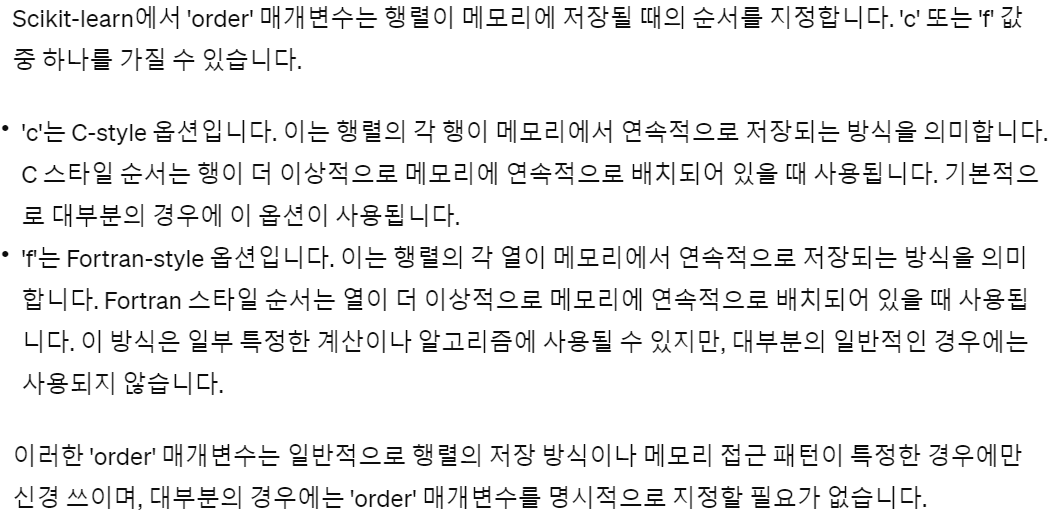

### 텐서 데이터의 메모리 저장 정보 및 메타 데이터
- 현재 저장 형태 검색 방향 정보, 시작 정보

In [30]:
t1 = torch.tensor([[1,2,3], [4,5,6]]) # 2행 3열 2차원 데이터 생성.
print(t1.shape, t1.ndim)
print(f't1.storage()=>{t1.storage()}') # 텐서.storage() : 내부 버퍼 반환.
print(f't1.storage_offset()', {t1.storage_offset()}) # 텐서.storage_offset() : 텐서가 시작되는 내부 버퍼의 오프셋(시작 위치)을 반환
print(f't1.stride()=> {t1.stride}') # 텐서의 차원에 따른 스트라이드(stride)를 반환
print(f't1.is_contiguous()=> {t1.is_contiguous()}') #연속적인지 확인

torch.Size([2, 3]) 2
t1.storage()=> 1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
t1.storage_offset() {0}
t1.stride()=> <built-in method stride of Tensor object at 0x0000024A1DE52540>
t1.is_contiguous()=> True


<용어 설명>
- 버퍼(buffer) : 실제 데이터를 저장하는 메모리 공간,pytorch는 버퍼의 일부를 참조하여 데이터에 접근.
- stride : 텐서의 각 차원을 따라 데이터 요소 간의 간격을 나타내며, 메모리에서의 데이터 배치 방식
    - 예) 2차원 텐서의 경우 첫 번째 차원의 스트라이드는 행 간의 간격이고, 두 번째 차원의 스트라이드는 열 간의 간격

In [28]:
# stride
# 2x3 크기의 행렬 생성
t = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 스트라이드 출력
print("tensor's stride", t.stride())

a = torch.tensor([[4, 8, 16, 20],
                 [5, 10, 15, 20],
                 [13, 26, 39, 52]]) 

# 스트라이드 출력
print("tensor's stride:", a.stride())

tensor's stride (3, 1)
tensor's stride: (4, 1)


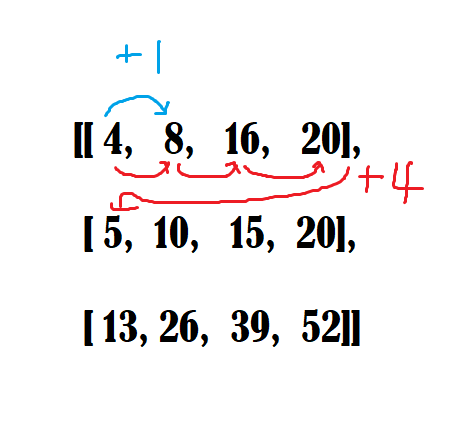

### 차원 제거/추가
- tensor.squeeze() : 텐서에서 차원이 1인 것 제거
- tensor.unsqueeze(dim) : 텐서에서 차원이 1인 것 추가

In [42]:
import numpy as np

# 데이터 생성
t1 = torch.tensor([[1,2], [3,4]]) # 2X2 행렬 == 2차원 방정식
t2 = torch.tensor([[1,2,3,4]]) # 1X4 == 2차원 방정식
t3 = torch.tensor([[[1,2,3,4]]]) # 1X1X4 ==  3차원 방정식 

In [43]:
# 사이즈, 차원, 포인터
print(f't1 => {t1.shape}, {t1.ndim}D, {t1.data_ptr()}') # 텐서.data_ptr() : 텐서의 데이터를 메모리에서 참조하는 포인터(pointer)를 반환
print(f't2 => {t2.shape}, {t2.ndim}D, {t2.data_ptr()}') 
print(f't3 => {t3.shape}, {t3.ndim}D, {t3.data_ptr()}')

# 포인터 = 텐서의 첫 번째 요소, 텐서의 데이터가 메모리에 저장된 위치


t1 => torch.Size([2, 2]), 2D, 2831348335168
t2 => torch.Size([1, 4]), 2D, 2831348335296
t3 => torch.Size([1, 1, 4]), 3D, 2831348335360


In [41]:
t11 = t1.squeeze()
t22 = t2.squeeze()
t33 = t3.squeeze()
t44 = t3.squeeze(dim=0) # 지정된 것만 (0 데이터수, 1 채널, 2 높이, 3 너비) 순
#  ▲ 첫 번째 차원의 크기가 1인 경우에만 해당 차원을 제거

print(f't1 차원 축소 => \n{t11}, {t11.shape}, {t11.ndim}D, {t11.data_ptr()}\n') # 2X2 ==> 줄일 것이 없음!!
print(f't2 차원 축소 => \n{t22}, {t22.shape}, {t22.ndim}D, {t22.data_ptr()}\n') # 1X4 ▶ 4
print(f't3 차원 축소 => \n{t33}, {t33.shape}, {t33.ndim}D, {t33.data_ptr()}\n') # 1X1X4 ▶ 4
print(f't4 차원 축소 => \n{t44}, {t44.shape}, {t44.ndim}D, {t44.data_ptr()}\n') # 1X1X4 ▶ 1 X 4


# data_ptr 값은 그대로임. 1이었던 것만 하나 사라짐.

t1 차원 축소 => 
tensor([[1, 2],
        [3, 4]]), torch.Size([2, 2]), 2D, 2831348334912

t2 차원 축소 => 
tensor([1, 2, 3, 4]), torch.Size([4]), 1D, 2831348334976

t3 차원 축소 => 
tensor([1, 2, 3, 4]), torch.Size([4]), 1D, 2831348335104

t4 차원 축소 => 
tensor([[1, 2, 3, 4]]), torch.Size([1, 4]), 2D, 2831348335104



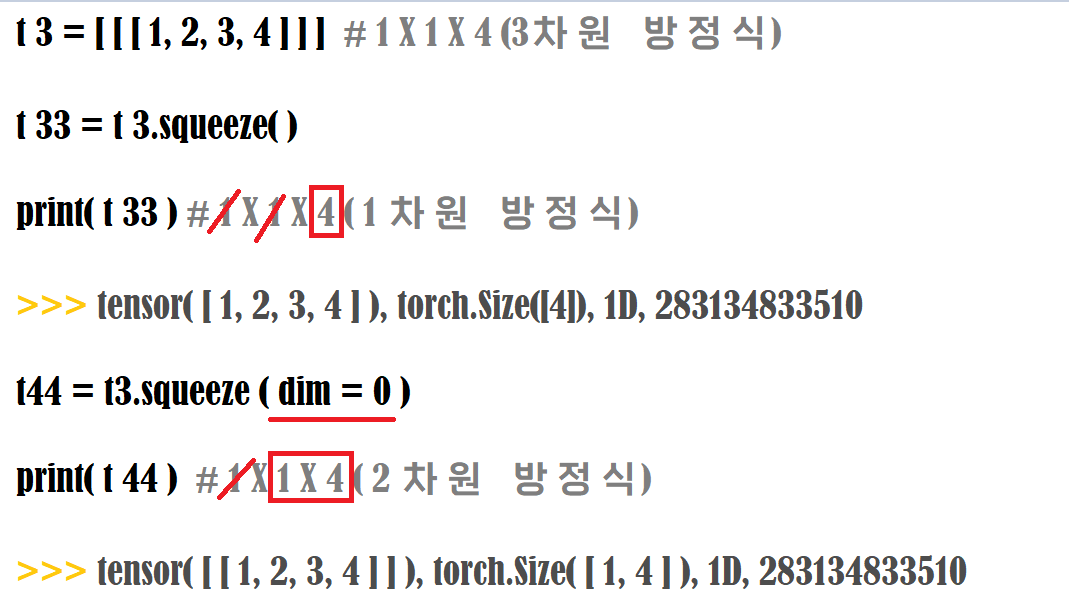

In [45]:
# 원소/ 요소 수 변경 없이 1 차원 증가 시키기 => torch.unsqueeze(dim)
print(f't1 정보 => {t1.shape}, {t1.ndim}D, {t1.data_ptr()}, {t1.stride()}')


t1 정보 => torch.Size([2, 2]), 2D, 2831348335168, (2, 1)


In [48]:
t11 = t1.unsqueeze(dim=0)
t22 = t1.unsqueeze(dim=-1)

print(f't1 차원 추가 => \n{t11}, {t11.shape}, {t11.ndim}D, {t11.data_ptr()}, {t11.stride()}')
print(f't2 차원 추가 => \n{t22}, {t22.shape}, {t22.ndim}D, {t22.data_ptr()}, {t22.stride()}')

t1 차원 추가 => 
tensor([[[1, 2],
         [3, 4]]]), torch.Size([1, 2, 2]), 3D, 2831348335168, (4, 2, 1)
t2 차원 추가 => 
tensor([[[1],
         [2]],

        [[3],
         [4]]]), torch.Size([2, 2, 1]), 3D, 2831348335168, (2, 1, 1)


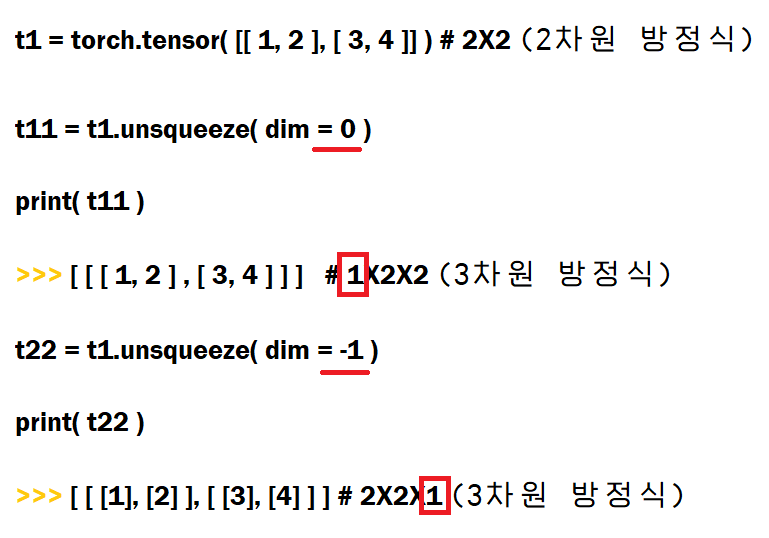

### Tensor 차원/ 형태 변경

In [49]:
t1 = torch.tensor([[[1,2], [11,22], [44,55]]])
print(f't1.shape => {t1.shape}, {t1.ndim}D') # 1, 3, 2

t1.shape => torch.Size([1, 3, 2]), 3D


T -> 행 ↔ 열 (2차원)

In [51]:
 # 2개의 차원을 변경하는 메서드 
#t1.transpose() #이대로는 오류 빰!
t11 = t1.transpose(0, 2) # HEY T, 0번 자리와 2번 자리를 서로 바꿔줘~
print(f't11.shape => {t11.shape}, {t11.ndim}D') # 2, 3, 1

t11.shape => torch.Size([2, 3, 1]), 3D


텐서.permute()

In [52]:
 # 2개의 차원을 변경하는 메서드 
t22 = t1.permute(1,2,0) # 첫번쨰자리에 3번 자리 두번째 자리에 2번 자리, 세번째 0번자리 넣어줘.)
print(f't22.shape => {t22.shape}, {t22.ndim}D')

t22.shape => torch.Size([3, 2, 1]), 3D


In [53]:
print(f't1.data_ptr() => {t1.data_ptr()}, \nt11.data_ptr() => {t11.data_ptr()}, \nt22.data_ptr() => {t22.data_ptr()}')

t1.data_ptr() => 2831348145024, 
t11.data_ptr() => 2831348145024, 
t22.data_ptr() => 2831348145024
